# LightwaveExplorer Data Analyzation & Visualization
This jupyter notebook gives a few data 

In [2]:
#Import Python modules
import LightwaveExplorer as lwe
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 14

### Loading Simulation Data and Structure Analyzation

In [3]:
# Insert the path to your simulation results here
SiO2_1mm_xpol = lwe.load("LWE-results/fused-silica-1mm-50nJ-30THz-10000nmbeamwaist-xpol.zip")
SiO2_2mm_xpol = lwe.load("LWE-results/fused-silica-2mm-50nJ-30THz-10000nmbeamwaist-xpol.zip")
SiO2_1mm_circpol = lwe.load("LWE-results/fused-silica-1mm-50nJ-30THz-10000nmbeamwaist-circpol.zip")
Vac_1mm_xpol = lwe.load("LWE-results/vacuum-1mm-50nJ-30THz-10000nmbeamwaist-xpol.zip")

### Refractive Index

In [ ]:
#first we'll make a wavelength grid to work with
l = np.linspace(0.3,3,1024)

#next we'll need Sellmeier coefficients, these are for barium fluoride, H. H. Li., J. Phys. Chem. Ref. Data 9, 161-289 (1980)
a = lwe.getSellmeierFromRII("https://refractiveindex.info/database/data-nk/main/SiO2/Malitson.yml")
b = lwe.getSellmeierFromRII("https://refractiveindex.info/database/data-nk/main/BaF2/Malitson.yml")

#we can get the refractive index for the wavelengths we put in the grid by calling the sellmeier() function
#from the lightwaveExplorer module, with the equationType set to 0.
n = lwe.sellmeier(l, a, 0)
n2 = lwe.sellmeier(l, b, 0)

#let's make it so we can adjust the resonances of the oscillators and see how it affects the index

fig,ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(l,np.real(n),label="SiO2",color="blue")
ax.plot(l,np.real(n2), label = "BaF2", color = "red")
ax.set_xlabel("Wavelength (" + r'$\mu$' + "m)")
ax.set_ylabel("Refractive index n")
plt.title("Refractive index of different materials")
ax.legend()
plt.savefig("graphs/refractive-index-SiO2-BaF2")
plt.show()

### On-Axis Electric Field

(1024,)
(1024,)
7.559475230740759
19.812344297409666
4.393089469191651


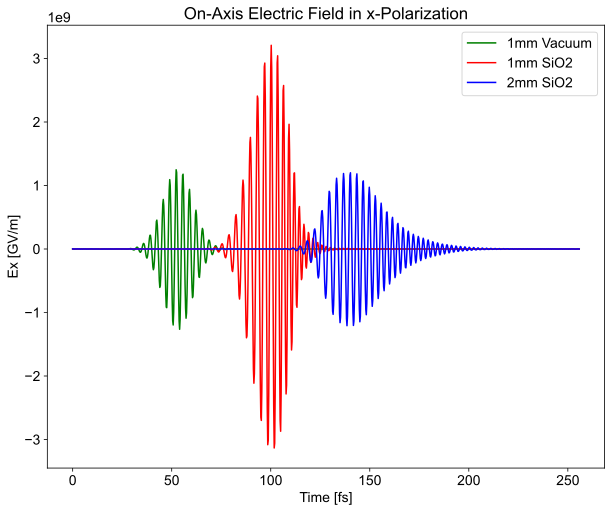

In [46]:
x = SiO2_1mm_xpol.timeVector * 1e15  # convert to fs
y1 = SiO2_1mm_xpol.Ext_x[:,87]       # select on-axis column
y2 = SiO2_2mm_xpol.Ext_x[:,87]
y3 = SiO2_1mm_circpol.Ext_x[:,87]
y4 = Vac_1mm_xpol.Ext_x[:,87]

print(x.shape)
print(y1.shape)
# FWHM's
print(lwe.fwhm(x, y1))
print(lwe.fwhm(x, y2))
print(lwe.fwhm(x, y4))

plt.figure(figsize=(10, 8))
plt.plot(x, y4, 'green', label='1mm Vacuum') #, FWHM=4.39fs
plt.plot(x, y1, 'red', label='1mm SiO2') #, FWHM=7.56fs
plt.plot(x, y2, 'blue', label='2mm SiO2') #, FWHM=19.81fs
plt.xlabel('Time [fs]')
plt.ylabel('Ex [GV/m]')
plt.title('On-Axis Electric Field in x-Polarization')
plt.legend()
plt.savefig('graphs/on-axis-electric-field-x-pol')
plt.show()

### Energy Spectrum

(513,)


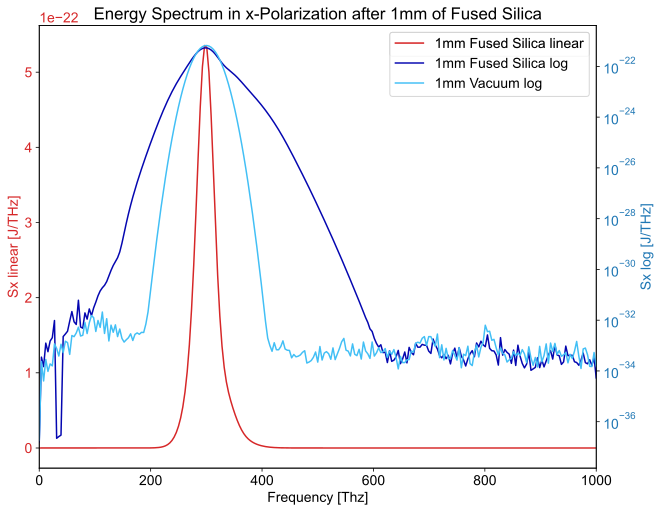

In [43]:
#x = SiO2_1mm_xpol.frequencyVectorSpectrum / 1e12 # convert to THz
data = lwe.load("LWE-results/fused-silica-1mm-50nJ-30THz-10000nmbeamwaist-circpol.zip")
data2 = lwe.load("LWE-results/vacuum-1mm-50nJ-30THz-10000nmbeamwaist-circpol.zip")
x = data.frequencyVectorSpectrum /1e12
y1 = data.spectrum_x
y2 = data2.spectrum_x
#y2 = SiO2_2mm_xpol.Ext_x[:,87]
#y3 = SiO2_1mm_circpol.Ext_x[:,87]
#y4 = Vac_1mm_xpol.Ext_x[:,87]
print(y1.shape)
fig, ax1 = plt.subplots(figsize=(10,8))

color1 = 'tab:red'
ax1.set_xlabel('Frequency [Thz]')
ax1.set_ylabel('Sx linear [J/THz]', color=color1)
ax1.plot(x, y1, color=color1, label='1mm Fused Silica linear')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlim((0,1000))
plt.legend(loc=1)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
#color3 = 'tab:lightblue'
ax2.set_ylabel('Sx log [J/THz]', color=color2)
ax2.set_yscale('log')
ax2.plot(x, y1, color='#0406b0', label='1mm Fused Silica log')
ax2.plot(x, y2, color='#42bff5', label='1mm Vacuum log')
ax2.tick_params(axis='y', labelcolor=color2)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

#plt.legend()#plt.legend(ax1.plot(x, y1, color=color1, label='1mm Fused Silica linear')+ax2.plot(x, y1, color='#0406b0', label='1mm Fused Silica log'), [ax1.plot(x, y1, color=color1, label='1mm Fused Silica linear').get_label(), ax2.plot(x, y1, color='#0406b0', label='1mm Fused Silica log').get_label()])
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Energy Spectrum in x-Polarization after 1mm of Fused Silica')
plt.savefig('graphs/energy-spectrum-after-1mm-fused-silica')
plt.show()

In [ ]:
from scipy.fft import fft2

y = SiO2_1mm_xpol.frequencyVector / 1e12 # convert to THz
x = SiO2_1mm_xpol.spaceVector
print(x.shape)
z = np.abs(fft2(SiO2_1mm_xpol.Ext_x))
z_norma = lwe.norma(z)
z_log = 10 * np.log10(z / np.max(z))
#y2 = SiO2_2mm_xpol.Ext_x[:,87]
#y3 = SiO2_1mm_circpol.Ext_x[:,87]
#y4 = Vac_1mm_xpol.Ext_x[:,87]
print(z.shape)
X,Y = np.meshgrid(x,y)
Z=z_norma

plt.figure(figsize=(10,5))
plt.pcolormesh(Y,X,Z, shading="nearest", cmap='magma_r', norm=matplotlib.colors.LogNorm())
plt.xlabel("Frequency [THz]")
plt.ylabel("Position [" + r'$\mu$' + "m]")
plt.xlim((-2000,0))
plt.savefig("graphs/output")
plt.colorbar()
plt.show()



### Electric Field Grid

In [ ]:
result_electric_field_grid = lwe.load('LWE-results/fused-silica-1mm-50nJ-30THz-10000nmbeamwaist-circpol-electric-field-grid.zip')

y = result_electric_field_grid.timeVector * 1e15 # convert to fs
x = result_electric_field_grid.spaceVector * 1e6
print(x.shape)
z = result_electric_field_grid.Ext_x
#z_norma = lwe.norma(z)
#z = np.abs(fft2(SiO2_1mm_xpol.Ext_x))
#z_norma = lwe.norma(z)
#z_log = 10 * np.log10(z / np.max(z))
#y2 = SiO2_2mm_xpol.Ext_x[:,87]
#y3 = SiO2_1mm_circpol.Ext_x[:,87]
#y4 = Vac_1mm_xpol.Ext_x[:,87]
print(z.shape)
X,Y = np.meshgrid(x,y)
Z=z

# custom colormap that diverges from black in the middle
hue_neg, hue_pos = 260, 40
custom_cmap = sns.diverging_palette(hue_neg, hue_pos, center="dark", as_cmap=True)

plt.figure(figsize=(10,5))
plt.pcolormesh(Y,X,Z, shading="gouraud", cmap=custom_cmap) #norm=matplotlib.colors.LogNorm()
plt.xlabel("Time [fs]")
plt.ylabel("Position [" + r'$\mu$' + "m]")
#plt.xlim((-2000,0))
plt.title('Electric Field Grid Ex(x, y=0, t)')
clb = plt.colorbar()
clb.ax.set_title('Ex [GV/m]')
plt.savefig("graphs/electric-field-grid")
plt.close()

### Evolution of Spectrum as a function of propagation distance in the medium

In [19]:
#from scipy.fft import fft2

SiO2_batch = lwe.load("LWE-results/fused-silica-50nJ-30THz-10000nmbeamwaist-circpol-batch-0to500thickness-120steps.zip")
print(SiO2_batch.Ext_x.shape)
x = SiO2_batch.frequencyVectorSpectrum / 1e12 # convert to THz
print(x.shape)
#x = SiO2_1mm_xpol.spaceVector
y = SiO2_batch.batchVector * 1000   # convert to microns
print(y)
print(y.shape)
print(x)
z = SiO2_batch.spectrum_x
z_norma = lwe.norma(z)
print(z.shape)
#z = np.abs(fft2(SiO2_1mm_xpol.Ext_x))
#z_norma = lwe.norma(z)
#z_log = 10 * np.log10(z / np.max(z))
#y2 = SiO2_2mm_xpol.Ext_x[:,87]
#y3 = SiO2_1mm_circpol.Ext_x[:,87]
#y4 = Vac_1mm_xpol.Ext_x[:,87]
print(z.shape)
X,Y = np.meshgrid(x,y)
Z=z_norma

plt.figure(figsize=(10,5))
plt.pcolormesh(Y,X,Z, shading="nearest", cmap='magma', norm=matplotlib.colors.LogNorm())
plt.xlabel("Position [" + r'$\mu$' + "m]")
plt.ylabel("Frequency [THz]")
#plt.ylim((0,00))
#plt.xlim((0,100))
plt.title('Spectral Evolution with Propagation Depth in Fused Silica')
plt.colorbar()
plt.savefig("graphs/spectral-evolution-with-propagation-depth-bigbatch")
plt.close()


(512, 176, 120)
(257,)
[0.         0.00420168 0.00840336 0.01260504 0.01680672 0.0210084
 0.02521008 0.02941176 0.03361345 0.03781513 0.04201681 0.04621849
 0.05042017 0.05462185 0.05882353 0.06302521 0.06722689 0.07142857
 0.07563025 0.07983193 0.08403361 0.08823529 0.09243697 0.09663866
 0.10084034 0.10504202 0.1092437  0.11344538 0.11764706 0.12184874
 0.12605042 0.1302521  0.13445378 0.13865546 0.14285714 0.14705882
 0.1512605  0.15546218 0.15966387 0.16386555 0.16806723 0.17226891
 0.17647059 0.18067227 0.18487395 0.18907563 0.19327731 0.19747899
 0.20168067 0.20588235 0.21008403 0.21428571 0.21848739 0.22268908
 0.22689076 0.23109244 0.23529412 0.2394958  0.24369748 0.24789916
 0.25210084 0.25630252 0.2605042  0.26470588 0.26890756 0.27310924
 0.27731092 0.28151261 0.28571429 0.28991597 0.29411765 0.29831933
 0.30252101 0.30672269 0.31092437 0.31512605 0.31932773 0.32352941
 0.32773109 0.33193277 0.33613445 0.34033613 0.34453782 0.3487395
 0.35294118 0.35714286 0.36134454 0.36554

### Evolution of Spectrum as a function of puls energy

In [44]:
SiO2_batch_pulsenery = lwe.load("LWE-results/fused-silica-50nJ-30THz-10000nmbeamwaist-circpol-batch-1e-8to1e-7pulsenergy-100steps.zip")
print(SiO2_batch_pulsenery.Ext_x.shape)
x = SiO2_batch_pulsenery.frequencyVectorSpectrum / 1e12 # convert to THz
print(x.shape)
#x = SiO2_1mm_xpol.spaceVector
y = SiO2_batch_pulsenery.batchVector * 1e9  # convert to nJ
print(y)
print(y.shape)
print(x)
z = SiO2_batch_pulsenery.spectrum_x
z_norma = lwe.norma(z)
print(z.shape)
#z = np.abs(fft2(SiO2_1mm_xpol.Ext_x))
#z_norma = lwe.norma(z)
#z_log = 10 * np.log10(z / np.max(z))
#y2 = SiO2_2mm_xpol.Ext_x[:,87]
#y3 = SiO2_1mm_circpol.Ext_x[:,87]
#y4 = Vac_1mm_xpol.Ext_x[:,87]
print(z.shape)
X,Y = np.meshgrid(x,y)
Z=z_norma

plt.figure(figsize=(10,5))
plt.pcolormesh(Y,X,Z, shading="nearest", cmap='magma', norm=matplotlib.colors.LogNorm())
plt.xlabel("Pulse Energy [nJ]")
plt.ylabel("Frequency [THz]")
#plt.ylim((0,00))
#plt.xlim((0,100))
plt.title('Spectral Evolution with Pulse Energy')
plt.colorbar()
plt.savefig("graphs/spectral-evolution-with-puls-energy-bigbatch")
plt.close()

(320, 248, 100)
(161,)
[ 10.          10.90909091  11.81818182  12.72727273  13.63636364
  14.54545455  15.45454545  16.36363636  17.27272727  18.18181818
  19.09090909  20.          20.90909091  21.81818182  22.72727273
  23.63636364  24.54545455  25.45454545  26.36363636  27.27272727
  28.18181818  29.09090909  30.          30.90909091  31.81818182
  32.72727273  33.63636364  34.54545455  35.45454545  36.36363636
  37.27272727  38.18181818  39.09090909  40.          40.90909091
  41.81818182  42.72727273  43.63636364  44.54545455  45.45454545
  46.36363636  47.27272727  48.18181818  49.09090909  50.
  50.90909091  51.81818182  52.72727273  53.63636364  54.54545455
  55.45454545  56.36363636  57.27272727  58.18181818  59.09090909
  60.          60.90909091  61.81818182  62.72727273  63.63636364
  64.54545455  65.45454545  66.36363636  67.27272727  68.18181818
  69.09090909  70.          70.90909091  71.81818182  72.72727273
  73.63636364  74.54545455  75.45454545  76.36363636  77.2727

### Pulse width Evolution

(512, 176, 120)
(512, 120)
[7.21454590e+02 1.25672729e+03 1.78981824e+03 8.46545471e+02
 1.39636368e+02 3.49090912e+02 1.16363640e+01 4.01454559e+02
 1.11127271e+03 1.23345459e+03 7.85454559e+01 2.05963647e+03
 3.29600000e+03 1.50109094e+03 2.24872729e+03 5.01236377e+03
 3.84581836e+03 9.28000000e+02 5.87200000e+03 6.30981836e+03
 1.37018188e+03 5.56218213e+03 8.23272754e+03 3.92145459e+03
 4.19490918e+03 8.66327344e+03 5.45745459e+03 2.85090918e+03
 7.78472754e+03 3.80800000e+03 5.20145459e+03 7.49963672e+03
 3.86327295e+03 1.95490918e+04 1.63258184e+04 1.86647285e+04
 6.14167305e+04 5.75069102e+04 3.02545469e+04 1.57056000e+05
 1.89486547e+05 7.42981836e+03 3.31322188e+05 5.28046562e+05
 2.32820375e+05 5.62245812e+05 1.26610038e+06 9.75744000e+05
 6.57431312e+05 2.63355350e+06 2.88571925e+06 4.86400000e+03
 4.70018350e+06 7.01406300e+06 2.88148950e+06 6.87806850e+06
 1.46518930e+07 1.07333070e+07 6.99497900e+06 2.65956660e+07
 2.78171300e+07 2.79854565e+03 4.14841840e+07 5.91648880e+

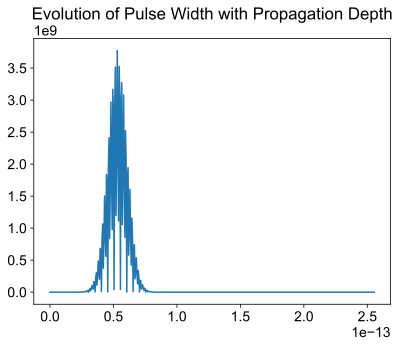

In [5]:
SiO2_batch_pulswidth = lwe.load("LWE-results/fused-silica-50nJ-30THz-10000nmbeamwaist-circpol-batch-0to500thickness-120steps.zip")
print(SiO2_batch_pulswidth.Ext_x.shape)
print(SiO2_batch_pulswidth.Ext_x[:,87,:].shape)
temp = []
for n in range(len(SiO2_batch_pulswidth.batchVector)):
    temp.append(lwe.fwhm(SiO2_batch_pulswidth.timeVector, np.abs(SiO2_batch_pulswidth.Ext_x[:,87,n])))
    print(np.abs(SiO2_batch_pulswidth.Ext_x[:,87,n]))
  #np.append(pulswidths, lwe.fwhm(SiO2_batch_pulswidth.timeVector, SiO2_batch_pulswidth.Ext_x[:,87,n]))
temp = np.array(temp)
print(SiO2_batch_pulswidth.Ext_x[:,87,1].shape)
print(temp.shape)
#pulswidths = lwe.fwhm(SiO2_batch_pulswidth.timeVector, temp) #SiO2_batch_pulswidth.Ext_x[:,87,:])

#print(pulswidths.shape)
#print(lwe.fwhm(SiO2_batch_pulswidth.timeVector, SiO2_batch_pulswidth.Ext_x[:,87,1]))
x = SiO2_batch_pulswidth.batchVector
print(len(SiO2_batch_pulswidth.batchVector))
#print(temp)
plt.title('Evolution of Pulse Width with Propagation Depth')
plt.plot(SiO2_batch_pulswidth.timeVector,np.abs(SiO2_batch_pulswidth.Ext_x[:,87,1]) ) #(x,temp,'red')
plt.show()

### Bandwidth Evolution

(120, 257)
[35.42554166 35.42585199 35.42677595 35.42828899 35.43047442 35.43326622
 35.43670423 35.44082835 35.44544236 35.45081211 35.45672802 35.46336258
 35.47059714 35.47846579 35.48700043 35.4961446  35.50601689 35.51649708
 35.52762449 35.53918642 35.55179732 35.56491141 35.57876554 35.59337423
 35.60821353 35.6241578  35.64081984 35.65781384 35.6757865  35.69437971
 35.71365059 35.73362437 35.75454719 35.77572085 35.79778137 35.82087873
 35.84447945 35.86901146 35.89360141 35.91979841 35.94641941 35.97399684
 36.0018494  36.03077874 36.06066863 36.09093389 36.12220047 36.15429496
 36.1868534  36.22073448 36.25519506 36.29056725 36.32682481 36.36352486
 36.40085807 36.43997006 36.47932004 36.52012049 36.56119257 36.60321297
 36.64624646 36.69405237 36.74300023 36.79399747 36.8444731  36.89783728
 36.95134904 37.00587436 37.06096789 37.11801526 37.17579915 37.23424879
 37.29417445 37.35510075 37.41670728 37.48084888 37.54460793 37.61067848
 37.67714034 37.74471646 37.8144294  37.

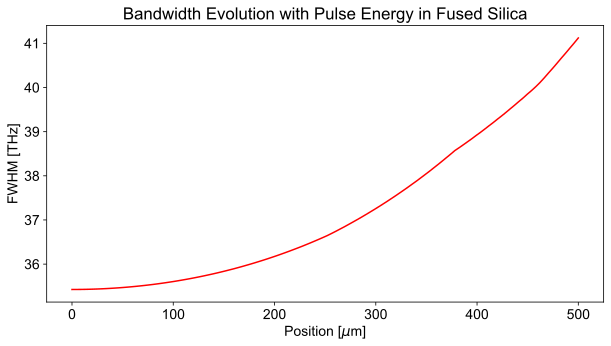

In [49]:
SiO2_batch_bandwidth = lwe.load("LWE-results/fused-silica-50nJ-30THz-10000nmbeamwaist-circpol-batch-0to500thickness-120steps.zip")
#print(SiO2_batch_pulswidth.Ext_x.shape)
#print(SiO2_batch_pulswidth.Ext_x[:,87,:].shape)
temp = []
for n in range(len(SiO2_batch_bandwidth.batchVector)):
    temp.append(lwe.fwhm(SiO2_batch_bandwidth.frequencyVectorSpectrum, SiO2_batch_bandwidth.spectrumTotal[n,:]))
  #np.append(pulswidths, lwe.fwhm(SiO2_batch_pulswidth.timeVector, SiO2_batch_pulswidth.Ext_x[:,87,n]))
temp = np.array(temp) / 1e12 # conversion to THz
#print(SiO2_batch_pulswidth.Ext_x[:,87,1].shape)
#print(temp.shape)
#pulswidths = lwe.fwhm(SiO2_batch_pulswidth.timeVector, temp) #SiO2_batch_pulswidth.Ext_x[:,87,:])
print(SiO2_batch_bandwidth.spectrumTotal.shape)
print(temp)
x = SiO2_batch_bandwidth.batchVector * 1e6  # conversion to microns
#y = lwe.fwhm(x, SiO2_batch_bandwidth.spectrumTotal[:])
#print(pulswidths.shape)
#print(lwe.fwhm(SiO2_batch_pulswidth.timeVector, SiO2_batch_pulswidth.Ext_x[:,87,1]))
#print(len(SiO2_batch_pulswidth.batchVector))
#print(temp)
plt.figure(figsize=(10,5))
plt.plot(x,temp,'red')
plt.xlabel("Position [" + r'$\mu$' + "m]")
plt.ylabel("FWHM [THz]")
plt.title('Bandwidth Evolution with Pulse Energy in Fused Silica')
plt.savefig('graphs/bandwidth-evolution-with-propagation-depth-fused-silica')
plt.show()

In [ ]:
n = 1.4504                                          # refractive index for fused silica
x = results.spaceVector
y = results.frequencyVectorSpectrum  # wavelength values for x-axis
#y = np.linspace(0,(sp.constants.c * n / results.frequencyVector)[161], num=1024)    #reverse data
z = (results.Ext_x**2)[:513] #lwe.normaM(results.Ext_x)
z_normalized = lwe.norma(z)

y[0] = y[1]                                     # fix 0 value for y[0]
print(x.shape)
print(y.shape)
print(z.shape)
print(sp.constants.c)
#print(results.frequencyVector[:161])
print(y[:161])
#print(y)

X,Y = np.meshgrid(x,y)
Z=z_normalized

#plt.xlim(-10, 10)

plt.figure(figsize=(5,10))
plt.pcolormesh(X,Y,Z, shading='flat', norm=matplotlib.colors.LogNorm()) #shading='gouraud'
plt.xlabel("position x [m]")
plt.ylabel("time t [s]")
#plt.yscale('log', base=10)
plt.savefig("graphs/output")
plt.show()

In [ ]:
n = 1.4504
x =  results.frequencyVectorSpectrum / 1e12#[::-1] #sp.constants.c * n/
y1 = results.spectrum_x
y2 = results.spectrum_x
x[0] = x[1]
print(x.shape)
print(y2)
print(y2.shape)

fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('Frequency [Thz]')
ax1.set_ylabel('Spectrum linear [J/THz]', color=color1)
ax1.plot(x, y1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlim((0,1000))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('Spectrum log [dB]', color=color2)  # we already handled the x-label with ax1
ax2.set_yscale('log')
ax2.plot(x, y2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

"""
plt.xlim((0,1000000000000000))
plt.yscale('log')
plt.ylabel('log')

plt.plot(x,y)
plt.show()"""